Sample CSV created: enjoy_sport.csv
     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Cold   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
4  Sunny    Cold   Normal    Weak  Warm     Same        Yes
5  Rainy    Cold   Normal  Strong  Cool     Same         No

Most Specific Hypothesis:
Sky         Sunny
AirTemp         ?
Humidity        ?
Wind            ?
Water           ?
Forecast        ?
dtype: object


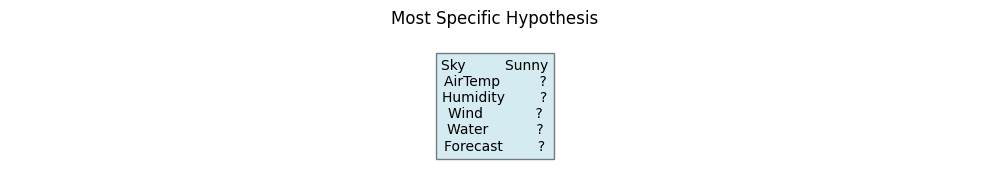


You can download the visualization for your report.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# First, let's create a sample dataset and save it as a CSV
# This is a sample dataset for concept learning with attributes:
# Sky, AirTemp, Humidity, Wind, Water, Forecast, and class EnjoySport

data = {
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy'],
    'AirTemp': ['Warm', 'Warm', 'Cold', 'Warm', 'Cold', 'Cold'],
    'Humidity': ['Normal', 'High', 'High', 'High', 'Normal', 'Normal'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Water': ['Warm', 'Warm', 'Cold', 'Cool', 'Warm', 'Cool'],
    'Forecast': ['Same', 'Same', 'Change', 'Change', 'Same', 'Same'],
    'EnjoySport': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df.to_csv('enjoy_sport.csv', index=False)
print("Sample CSV created: enjoy_sport.csv")
print(df)

# Function to create initial specific boundary
def get_initial_specific_hypothesis(first_positive_instance):
    return first_positive_instance

# Function to find the most specific hypothesis
def find_most_specific_hypothesis(data_path):
    # Read the data
    df = pd.read_csv(data_path)

    # Separate features and target
    X = df.iloc[:, :-1]  # All columns except the last one (class)
    y = df.iloc[:, -1]   # Last column (class)

    # Find the first positive instance
    positive_instances = X[y == 'Yes']
    if len(positive_instances) == 0:
        return "No positive instances found."

    # Initialize specific hypothesis with the first positive instance
    specific_hypothesis = positive_instances.iloc[0].tolist()

    # Refine the specific hypothesis using other positive instances
    for index, instance in positive_instances.iterrows():
        for i in range(len(specific_hypothesis)):
            if specific_hypothesis[i] != instance.iloc[i]:
                specific_hypothesis[i] = '?'  # Replace with '?' if values are different

    return pd.Series(specific_hypothesis, index=X.columns)

# Find the most specific hypothesis
specific_hypothesis = find_most_specific_hypothesis('enjoy_sport.csv')
print("\nMost Specific Hypothesis:")
print(specific_hypothesis)

# Visualize the hypothesis
plt.figure(figsize=(10, 2))
plt.axis('off')
plt.title('Most Specific Hypothesis')
plt.text(0.5, 0.5, f"{specific_hypothesis.to_string()}",
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='lightblue', alpha=0.5))
plt.tight_layout()
plt.savefig('specific_hypothesis.png')
plt.show()

print("\nYou can download the visualization for your report.")